In [1]:
import sys
sys.version

'3.8.0 (default, Oct 28 2019, 16:14:01) \n[GCC 8.3.0]'

# 第1章
https://nlp100.github.io/ja/ch01.html

## 00. 文字列の逆順
文字列”stressed”の文字を逆に（末尾から先頭に向かって）並べた文字列を得よ．

In [2]:
"stressed"[::-1]

'desserts'

## 01. 「パタトクカシーー」
「パタトクカシーー」という文字列の1,3,5,7文字目を取り出して連結した文字列を得よ．

In [3]:
"パタトクカシーー"[::2]

'パトカー'

## 02. 「パトカー」＋「タクシー」＝「パタトクカシーー」
「パトカー」＋「タクシー」の文字を先頭から交互に連結して文字列「パタトクカシーー」を得よ．

In [4]:
nulljoin = lambda x: "".join(x)
nulljoin([nulljoin(t) for t in zip("パトカー", "タクシー")])

'パタトクカシーー'

## 03. 円周率
“Now I need a drink, alcoholic of course, after the heavy lectures involving quantum mechanics.”という文を単語に分解し，各単語の（アルファベットの）文字数を先頭から出現順に並べたリストを作成せよ．

In [5]:
import re
s = "Now I need a drink, alcoholic of course, after the heavy lectures involving quantum mechanics."
list(map(lambda x: len(x), re.findall(r"[\w\-]+", s)))

[3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 9, 7, 9]

## 04. 元素記号
“Hi He Lied Because Boron Could Not Oxidize Fluorine. New Nations Might Also Sign Peace Security Clause. Arthur King Can.”という文を単語に分解し，1, 5, 6, 7, 8, 9, 15, 16, 19番目の単語は先頭の1文字，それ以外の単語は先頭の2文字を取り出し，取り出した文字列から単語の位置（先頭から何番目の単語か）への連想配列（辞書型もしくはマップ型）を作成せよ．

In [6]:
s = "Hi He Lied Because Boron Could Not Oxidize Fluorine. New Nations Might Also Sign Peace Security Clause. Arthur King Can."
ONE_LETTER = [1, 5, 6, 7, 8, 9, 15, 16, 19]
d = {}
for ind, word in enumerate(re.findall(r"[\w\-]+", s)):
    n_take = 1 if ind+1 in ONE_LETTER else 2
    atom = word[:n_take]
    d[atom] = ind+1
d

{'H': 1,
 'He': 2,
 'Li': 3,
 'Be': 4,
 'B': 5,
 'C': 6,
 'N': 7,
 'O': 8,
 'F': 9,
 'Ne': 10,
 'Na': 11,
 'Mi': 12,
 'Al': 13,
 'Si': 14,
 'P': 15,
 'S': 16,
 'Cl': 17,
 'Ar': 18,
 'K': 19,
 'Ca': 20}

## 05. n-gram
与えられたシーケンス（文字列やリストなど）からn-gramを作る関数を作成せよ．この関数を用い，”I am an NLPer”という文から単語bi-gram，文字bi-gramを得よ．

In [7]:
def n_gram(seq, n):
    return [seq[i:i+n] for i in range(len(seq)-n+1)]

s = "I am an NLPer"
wordwise = re.findall(r"[\w\-]+", s)
print(n_gram(wordwise, 2))
print(n_gram(s,2))

[['I', 'am'], ['am', 'an'], ['an', 'NLPer']]
['I ', ' a', 'am', 'm ', ' a', 'an', 'n ', ' N', 'NL', 'LP', 'Pe', 'er']


## 06. 集合
“paraparaparadise”と”paragraph”に含まれる文字bi-gramの集合を，それぞれ, XとYとして求め，XとYの和集合，積集合，差集合を求めよ．さらに，’se’というbi-gramがXおよびYに含まれるかどうかを調べよ．

In [8]:
sx = "paraparaparadise"
sy = "paragraph"
X = set(n_gram(sx,2))
Y = set(n_gram(sy,2))
print(X|Y)
print(X&Y)
print(X-Y)
print("se" in X, "se" in Y)

{'ad', 'ap', 'se', 'ph', 'ag', 'ra', 'pa', 'is', 'ar', 'di', 'gr'}
{'ra', 'pa', 'ap', 'ar'}
{'se', 'di', 'is', 'ad'}
True False


## 07. テンプレートによる文生成
引数x, y, zを受け取り「x時のyはz」という文字列を返す関数を実装せよ．さらに，x=12, y=”気温”, z=22.4として，実行結果を確認せよ．

In [9]:
template = lambda x,y,z: "{}時の{}は{}".format(x,y,z)
template(12, "気温", 22.4)

'12時の気温は22.4'

## 08. 暗号文
与えられた文字列の各文字を，以下の仕様で変換する関数cipherを実装せよ．

- 英小文字ならば(219 - 文字コード)の文字に置換
- その他の文字はそのまま出力

この関数を用い，英語のメッセージを暗号化・復号化せよ．

In [10]:
def cipher(s):
    return nulljoin([chr(219-ord(c)) if c.islower() else c for c in s])
print(s)
print(cipher(s))
print(cipher(cipher(s)))

I am an NLPer
I zn zm NLPvi
I am an NLPer


## 09. TypoglycemiaPermalink
スペースで区切られた単語列に対して，各単語の先頭と末尾の文字は残し，それ以外の文字の順序をランダムに並び替えるプログラムを作成せよ．ただし，長さが４以下の単語は並び替えないこととする．適当な英語の文（例えば”I couldn’t believe that I could actually understand what I was reading : the phenomenal power of the human mind .”）を与え，その実行結果を確認せよ．

In [11]:
from random import seed, sample
seed(42)

s = "I couldn’t believe that I could actually understand what I was reading : the phenomenal power of the human mind."
words = re.findall(r"[\w\-]+", s)
others = re.findall(r"[^\w\-]+", s)
ret = ""
for w,o in zip(words, others):
    if len(w) <= 4:
        ret += w
    else:
        ret += w[0] + nulljoin(sample(w[1:-1], len(w)-2)) + w[-1]
    ret += o
ret

'I coduln’t blvieee that I cluod acltluay uadrsentnd what I was rdneiag : the pehonnaeml pewor of the hmuan mind.'

----

# 第2章
https://nlp100.github.io/ja/ch02.html

popular-names.txtは，アメリカで生まれた赤ちゃんの「名前」「性別」「人数」「年」をタブ区切り形式で格納したファイルである．以下の処理を行うプログラムを作成し，popular-names.txtを入力ファイルとして実行せよ．さらに，同様の処理をUNIXコマンドでも実行し，プログラムの実行結果を確認せよ．

In [12]:
!wget -nc https://nlp100.github.io/data/popular-names.txt
!INPUT_FILE="popular-names.txt"
INPUT_FILE = "popular-names.txt"

File ‘popular-names.txt’ already there; not retrieving.



## 10. 行数のカウント
行数をカウントせよ．確認にはwcコマンドを用いよ．

In [13]:
with open(INPUT_FILE) as f:
    print(f.read().count('\n'))

2780


In [14]:
!wc -l $INPUT_FILE

2780 popular-names.txt


## 11. タブをスペースに置換

タブ1文字につきスペース1文字に置換せよ．確認にはsedコマンド，trコマンド，もしくはexpandコマンドを用いよ．タブ1文字につきスペース1文字に置換せよ．確認にはsedコマンド，trコマンド，もしくはexpandコマンドを用いよ．

In [15]:
with open(INPUT_FILE) as f:
    with open("11_pyout_" + INPUT_FILE, 'w') as g:
        for c in f.read():
            g.write(c if c != '\t' else ' ')

In [16]:
!cp $INPUT_FILE 11_cmdout_$INPUT_FILE; sed -i -e "s/\t/ /g" 11_cmdout_$INPUT_FILE
!diff 11_cmdout_$INPUT_FILE 11_pyout_$INPUT_FILE

## 12. 1列目をcol1.txtに，2列目をcol2.txtに保存

各行の1列目だけを抜き出したものをcol1.txtに，2列目だけを抜き出したものをcol2.txtとしてファイルに保存せよ．確認にはcutコマンドを用いよ．

In [17]:
c1, c2 = [], []
with open(INPUT_FILE) as f:
    while line := f.readline():
        c = line.split()
        c1.append(c[0] + "\n")
        c2.append(c[1] + "\n")
with open("col1.txt", 'w') as f:
    f.writelines(c1)
with open("col2.txt", 'w') as f:
    f.writelines(c2)

In [18]:
!cut -f 1 $INPUT_FILE > cmd_col1.txt
!cut -f 2 $INPUT_FILE > cmd_col2.txt
!diff col1.txt cmd_col1.txt
!diff col2.txt cmd_col2.txt

## 13. col1.txtとcol2.txtをマージ

12で作ったcol1.txtとcol2.txtを結合し，元のファイルの1列目と2列目をタブ区切りで並べたテキストファイルを作成せよ．確認にはpasteコマンドを用いよ.


In [19]:
writebuf = []
with open("col1.txt") as c1:
    with open("col2.txt") as c2:
        while (c1line := c1.readline().rstrip()) and \
            (c2line := c2.readline().rstrip()):
            writebuf.append(c1line + "\t" + c2line + "\n")
with open("13_pyout.txt", 'w') as f:
    f.writelines(writebuf)

In [20]:
!paste col1.txt col2.txt > 13_cmdout.txt
!diff 13_pyout.txt 13_cmdout.txt

## 14. 先頭からN行を出力

自然数Nをコマンドライン引数などの手段で受け取り，入力のうち先頭のN行だけを表示せよ．確認にはheadコマンドを用いよ．

In [21]:
def head(n):
    with open(INPUT_FILE) as f:
        while (line := f.readline()) and \
            (n := n-1) >= 0:
            print(line, end="")
head(10)

Mary	F	7065	1880
Anna	F	2604	1880
Emma	F	2003	1880
Elizabeth	F	1939	1880
Minnie	F	1746	1880
Margaret	F	1578	1880
Ida	F	1472	1880
Alice	F	1414	1880
Bertha	F	1320	1880
Sarah	F	1288	1880


In [22]:
!head $INPUT_FILE

Mary	F	7065	1880
Anna	F	2604	1880
Emma	F	2003	1880
Elizabeth	F	1939	1880
Minnie	F	1746	1880
Margaret	F	1578	1880
Ida	F	1472	1880
Alice	F	1414	1880
Bertha	F	1320	1880
Sarah	F	1288	1880


## 15. 末尾のN行を出力

自然数Nをコマンドライン引数などの手段で受け取り，入力のうち末尾のN行だけを表示せよ．確認にはtailコマンドを用いよ．

In [23]:
def tail(n):
    with open(INPUT_FILE) as f:
        lines = f.readlines()
        print(nulljoin(lines[-n:]), end="")
tail(10)

Liam	M	19837	2018
Noah	M	18267	2018
William	M	14516	2018
James	M	13525	2018
Oliver	M	13389	2018
Benjamin	M	13381	2018
Elijah	M	12886	2018
Lucas	M	12585	2018
Mason	M	12435	2018
Logan	M	12352	2018


In [24]:
!tail $INPUT_FILE

Liam	M	19837	2018
Noah	M	18267	2018
William	M	14516	2018
James	M	13525	2018
Oliver	M	13389	2018
Benjamin	M	13381	2018
Elijah	M	12886	2018
Lucas	M	12585	2018
Mason	M	12435	2018
Logan	M	12352	2018


## 16. ファイルをN分割する

自然数Nをコマンドライン引数などの手段で受け取り，入力のファイルを行単位でN分割せよ．同様の処理をsplitコマンドで実現せよ．

In [25]:
def splitfile(n):
    with open(INPUT_FILE) as f:
        lines = f.readlines()
        n_line = len(lines)
        for i in range(n):
            with open("16_{:02d}_{}".format(i+1, INPUT_FILE), 'w') as w:
                w.write(nulljoin(lines[n_line*i//n : n_line*(i+1)//n]))
splitfile(5)

In [26]:
# なんで合わないんだろ

!split -n l/5 $INPUT_FILE 16_
!diff 16_aa 16_01_$INPUT_FILE

557,587d556
< Joseph	M	3844	1907
< Frank	M	2943	1907
< Edward	M	2576	1907
< Henry	M	2203	1907
< Mary	F	18665	1908
< Helen	F	8439	1908
< Margaret	F	6976	1908
< Ruth	F	6180	1908
< Anna	F	5860	1908
< Dorothy	F	5703	1908
< Elizabeth	F	4904	1908
< Mildred	F	4624	1908
< Alice	F	4270	1908
< Marie	F	4076	1908
< John	M	9342	1908
< William	M	7528	1908
< James	M	7012	1908
< George	M	4584	1908
< Robert	M	4219	1908
< Joseph	M	4162	1908
< Charles	M	3929	1908
< Frank	M	3146	1908
< Edward	M	2707	1908
< Thomas	M	2301	1908
< Mary	F	19259	1909
< Helen	F	9250	1909
< Margaret	F	7359	1909
< Ruth	F	6509	1909
< Dorothy	F	6253	1909
< Anna	F	5804	1909
< Elizabeth	F	5176	1909


## 17. １列目の文字列の異なり

1列目の文字列の種類（異なる文字列の集合）を求めよ．確認にはcut, sort, uniqコマンドを用いよ．

In [27]:
s = set()
with open(INPUT_FILE) as f:
    while line := f.readline():
        s.add(line.split()[0])
len(s)

136

In [28]:
!cut -f1 $INPUT_FILE | sort | uniq | wc -l

136


## 18. 各行を3コラム目の数値の降順にソート

各行を3コラム目の数値の逆順で整列せよ（注意: 各行の内容は変更せずに並び替えよ）．確認にはsortコマンドを用いよ（この問題はコマンドで実行した時の結果と合わなくてもよい）．

In [29]:
with open(INPUT_FILE) as f:
    lines = f.readlines()
    sortlines = sorted(lines, key=lambda x: -int(x.split()[2]))
print(nulljoin(sortlines[:20]))

Linda	F	99689	1947
Linda	F	96211	1948
James	M	94757	1947
Michael	M	92704	1957
Robert	M	91640	1947
Linda	F	91016	1949
Michael	M	90656	1956
Michael	M	90517	1958
James	M	88584	1948
Michael	M	88528	1954
Michael	M	88327	1955
John	M	88319	1947
James	M	87436	1946
James	M	87261	1951
James	M	87063	1952
Michael	M	86917	1961
James	M	86857	1949
Robert	M	86604	1952
Robert	M	86351	1951
Robert	M	86298	1954



In [30]:
!sort -nr -k3 $INPUT_FILE | head -n20

Linda	F	99689	1947
Linda	F	96211	1948
James	M	94757	1947
Michael	M	92704	1957
Robert	M	91640	1947
Linda	F	91016	1949
Michael	M	90656	1956
Michael	M	90517	1958
James	M	88584	1948
Michael	M	88528	1954
Michael	M	88327	1955
John	M	88319	1947
James	M	87436	1946
James	M	87261	1951
James	M	87063	1952
Michael	M	86917	1961
James	M	86857	1949
Robert	M	86604	1952
Robert	M	86351	1951
Robert	M	86298	1954


## 19. 各行の1コラム目の文字列の出現頻度を求め，出現頻度の高い順に並べる

各行の1列目の文字列の出現頻度を求め，その高い順に並べて表示せよ．確認にはcut, uniq, sortコマンドを用いよ．

In [31]:
from collections import defaultdict
d = defaultdict(int)
with open(INPUT_FILE) as f:
    while line := f.readline():
        d[line.split()[0]] += 1
p = sorted(list(d.items()), key=lambda x:-x[1])
for i in p: print(i[0])


James
William
John
Robert
Mary
Charles
Michael
Elizabeth
Joseph
Margaret
George
Thomas
David
Richard
Helen
Frank
Christopher
Anna
Edward
Ruth
Patricia
Matthew
Dorothy
Emma
Barbara
Daniel
Joshua
Sarah
Linda
Jennifer
Emily
Jessica
Jacob
Mildred
Betty
Susan
Henry
Ashley
Nancy
Andrew
Florence
Marie
Donald
Amanda
Samantha
Karen
Lisa
Melissa
Madison
Olivia
Stephanie
Abigail
Ethel
Sandra
Mark
Frances
Carol
Angela
Michelle
Heather
Ethan
Isabella
Shirley
Kimberly
Amy
Ava
Virginia
Deborah
Brian
Jason
Nicole
Hannah
Sophia
Minnie
Bertha
Donna
Cynthia
Alice
Doris
Ronald
Brittany
Nicholas
Mia
Noah
Joan
Debra
Tyler
Ida
Clara
Judith
Taylor
Alexis
Alexander
Mason
Harry
Sharon
Steven
Tammy
Brandon
Liam
Anthony
Annie
Gary
Jeffrey
Jayden
Charlotte
Lillian
Kathleen
Justin
Austin
Chloe
Benjamin
Evelyn
Megan
Aiden
Harper
Elijah
Bessie
Larry
Rebecca
Lauren
Amelia
Logan
Oliver
Walter
Carolyn
Pamela
Lori
Laura
Tracy
Julie
Scott
Kelly
Crystal
Rachel
Lucas


In [32]:
!cut -f1 $INPUT_FILE | sort | uniq -c | sort -nr -k1 | cut -c 9-

James
William
Robert
John
Mary
Charles
Michael
Elizabeth
Joseph
Margaret
Thomas
George
David
Richard
Helen
Frank
Christopher
Anna
Edward
Ruth
Patricia
Matthew
Dorothy
Emma
Barbara
Joshua
Daniel
Sarah
Linda
Jennifer
Emily
Jessica
Jacob
Susan
Mildred
Betty
Henry
Ashley
Nancy
Andrew
Marie
Florence
Donald
Amanda
Samantha
Olivia
Melissa
Madison
Lisa
Karen
Stephanie
Abigail
Sandra
Mark
Ethel
Michelle
Isabella
Heather
Frances
Ethan
Carol
Angela
Shirley
Kimberly
Ava
Amy
Virginia
Sophia
Nicole
Jason
Hannah
Deborah
Brian
Minnie
Donna
Bertha
Cynthia
Ronald
Noah
Nicholas
Mia
Doris
Brittany
Alice
Tyler
Joan
Debra
Taylor
Mason
Judith
Ida
Clara
Alexis
Alexander
Tammy
Steven
Sharon
Liam
Harry
Brandon
Anthony
Jeffrey
Jayden
Gary
Charlotte
Annie
Lillian
Kathleen
Justin
Chloe
Benjamin
Austin
Megan
Harper
Evelyn
Elijah
Aiden
Rebecca
Oliver
Logan
Lauren
Larry
Bessie
Amelia
Walter
Tracy
Scott
Rachel
Pamela
Lucas
Lori
Laura
Kelly
Julie
Crystal
Carolyn


# 第3章: 正規表現

https://nlp100.github.io/ja/ch03.html

Wikipediaの記事を以下のフォーマットで書き出したファイル jawiki-country.json.gz がある．

- 1行に1記事の情報がJSON形式で格納される
- 各行には記事名が”title”キーに，記事本文が”text”キーの辞書オブジェクトに格納され，そのオブジェクトがJSON形式で書き出される
- ファイル全体はgzipで圧縮される

以下の処理を行うプログラムを作成せよ．


In [33]:
!wget -nc https://nlp100.github.io/data/jawiki-country.json.gz

File ‘jawiki-country.json.gz’ already there; not retrieving.



## 20. JSONデータの読み込み

Wikipedia記事のJSONファイルを読み込み，「イギリス」に関する記事本文を表示せよ．問題21-29では，ここで抽出した記事本文に対して実行せよ．

In [34]:
import gzip, json
JAWIKI = []
with gzip.open("jawiki-country.json.gz") as f:
    JAWIKI = [json.loads(line) for line in f]
UKtext = tuple(filter(lambda x: x['title'] == 'イギリス', JAWIKI))[0]['text']

## 21. カテゴリ名を含む行を抽出

記事中でカテゴリ名を宣言している行を抽出せよ．

In [35]:
import re
re.findall(r"\[\[Category:.+\]\]",UKtext)

['[[Category:イギリス|*]]',
 '[[Category:イギリス連邦加盟国]]',
 '[[Category:英連邦王国|*]]',
 '[[Category:G8加盟国]]',
 '[[Category:欧州連合加盟国|元]]',
 '[[Category:海洋国家]]',
 '[[Category:現存する君主国]]',
 '[[Category:島国]]',
 '[[Category:1801年に成立した国家・領域]]']

## 22. カテゴリ名を抽出

記事中でカテゴリ名を（行単位ではなく名前で）抽出せよ．

In [36]:
re.findall(r"\[\[Category:(.+)\]\]",UKtext)

['イギリス|*',
 'イギリス連邦加盟国',
 '英連邦王国|*',
 'G8加盟国',
 '欧州連合加盟国|元',
 '海洋国家',
 '現存する君主国',
 '島国',
 '1801年に成立した国家・領域']

## 23. セクション構造

記事中に含まれるセクション名とそのレベル（例えば”== セクション名 ==”なら1）を表示せよ．

In [37]:
for tpl in re.findall(r"={2,}(.+?)(={2,})", UKtext):
    print(tpl[0].strip(), ",", len(tpl[1])-1)

国名 , 1
歴史 , 1
地理 , 1
主要都市 , 2
気候 , 2
政治 , 1
元首 , 2
法 , 2
内政 , 2
地方行政区分 , 2
外交・軍事 , 2
経済 , 1
鉱業 , 2
農業 , 2
貿易 , 2
不動産 , 2
エネルギー政策 , 2
通貨 , 2
企業 , 2
通信 , 3
交通 , 1
道路 , 2
鉄道 , 2
海運 , 2
航空 , 2
科学技術 , 1
国民 , 1
言語 , 2
宗教 , 2
婚姻 , 2
移住 , 2
教育 , 2
医療 , 2
文化 , 1
食文化 , 2
文学 , 2
哲学 , 2
音楽 , 2
ポピュラー音楽 , 3
映画 , 2
コメディ , 2
国花 , 2
世界遺産 , 2
祝祭日 , 2
スポーツ , 2
サッカー , 3
クリケット , 3
競馬 , 3
モータースポーツ , 3
野球 , 3
カーリング , 3
自転車競技 , 3
脚注 , 1
関連項目 , 1
外部リンク , 1


## 24. ファイル参照の抽出

記事から参照されているメディアファイルをすべて抜き出せ．

In [38]:
re.findall(r"ファイル:(.+?\..+?)\|", UKtext)

['Royal Coat of Arms of the United Kingdom.svg',
 'Descriptio Prime Tabulae Europae.jpg',
 "Lenepveu, Jeanne d'Arc au siège d'Orléans.jpg",
 'London.bankofengland.arp.jpg',
 'Battle of Waterloo 1815.PNG',
 'Uk topo en.jpg',
 'BenNevis2005.jpg',
 'Population density UK 2011 census.png',
 '2019 Greenwich Peninsula & Canary Wharf.jpg',
 'Birmingham Skyline from Edgbaston Cricket Ground crop.jpg',
 'Leeds CBD at night.jpg',
 'Glasgow and the Clyde from the air (geograph 4665720).jpg',
 'Palace of Westminster, London - Feb 2007.jpg',
 'Scotland Parliament Holyrood.jpg',
 'Donald Trump and Theresa May (33998675310) (cropped).jpg',
 'Soldiers Trooping the Colour, 16th June 2007.jpg',
 'City of London skyline from London City Hall - Oct 2008.jpg',
 'Oil platform in the North SeaPros.jpg',
 'Eurostar at St Pancras Jan 2008.jpg',
 'Heathrow Terminal 5C Iwelumo-1.jpg',
 'Airbus A380-841 G-XLEB British Airways (10424102995).jpg',
 'UKpop.svg',
 'Anglospeak.svg',
 "Royal Aberdeen Children's Hospita

## 25. テンプレートの抽出

記事中に含まれる「基礎情報」テンプレートのフィールド名と値を抽出し，辞書オブジェクトとして格納せよ．

In [39]:
info = re.search(r"^\{\{基礎情報.*?\n\|(.*?)\n\}\}[^\|]$", UKtext, flags=re.DOTALL+re.MULTILINE).group(1)
makeitem = lambda l : tuple(map(lambda c: c.strip(), l.split("=", 1)))
makedict = lambda tx : dict( makeitem(l) for l in tx.split("\n|") )
makedict(info)

{'略名': 'イギリス',
 '日本語国名': 'グレートブリテン及び北アイルランド連合王国',
 '公式国名': '{{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />\n*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（[[スコットランド・ゲール語]]）\n*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（[[ウェールズ語]]）\n*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（[[アイルランド語]]）\n*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（[[コーンウォール語]]）\n*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（[[スコットランド語]]）\n**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>',
 '国旗画像': 'Flag of the United Kingdom.svg',
 '国章画像': '[[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]',
 '国章リンク': '（[[イギリスの国章|国章]]）',
 '標語': '{{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Dieu et mon droit|神と我が権利]]）',
 '国歌': "[[女王陛下万歳|{{lang|en|God Save t

## 26. 強調マークアップの除去

25の処理時に，テンプレートの値からMediaWikiの強調マークアップ（弱い強調，強調，強い強調のすべて）を除去してテキストに変換せよ（参考: マークアップ早見表）．

In [40]:
remvbold = re.sub(r"'+", "", info)
makedict(remvbold)

{'略名': 'イギリス',
 '日本語国名': 'グレートブリテン及び北アイルランド連合王国',
 '公式国名': '{{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />\n*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（[[スコットランド・ゲール語]]）\n*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（[[ウェールズ語]]）\n*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（[[アイルランド語]]）\n*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（[[コーンウォール語]]）\n*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（[[スコットランド語]]）\n**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>',
 '国旗画像': 'Flag of the United Kingdom.svg',
 '国章画像': '[[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]',
 '国章リンク': '（[[イギリスの国章|国章]]）',
 '標語': '{{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Dieu et mon droit|神と我が権利]]）',
 '国歌': '[[女王陛下万歳|{{lang|en|God Save t

## 27. 内部リンクの除去

26の処理に加えて，テンプレートの値からMediaWikiの内部リンクマークアップを除去し，テキストに変換せよ（参考: マークアップ早見表）．

In [41]:
remvlink = re.sub(r"\[\[([^\|\{\]]*?\|)*(.+?)\]\]", r"\2", remvbold)
makedict(remvlink)

{'略名': 'イギリス',
 '日本語国名': 'グレートブリテン及び北アイルランド連合王国',
 '公式国名': '{{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />\n*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（スコットランド・ゲール語）\n*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（ウェールズ語）\n*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（アイルランド語）\n*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（コーンウォール語）\n*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（スコットランド語）\n**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>',
 '国旗画像': 'Flag of the United Kingdom.svg',
 '国章画像': 'イギリスの国章',
 '国章リンク': '（国章）',
 '標語': '{{lang|fr|Dieu et mon droit}}<br />（フランス語:神と我が権利）',
 '国歌': '{{lang|en|God Save the Queen}}{{en icon}}<br />神よ女王を護り賜え<br />{{center|ファイル:United States Navy Band - God Save the Queen.ogg}}',
 '地図画像': 'Europe-UK.s

## 28. MediaWikiマークアップの除去

27の処理に加えて，テンプレートの値からMediaWikiマークアップを可能な限り除去し，国の基本情報を整形せよ．

In [42]:
remvref = re.sub(r"((.*?)<ref.*?</ref>(.*))|<ref.*/>|</ref>", "", remvlink)
remvforeign = re.sub(r"{{.*?\|.*?\|(.*?)[}}|）]{2}", r"\1", remvref)
remvblacket = re.sub(r"{{(\d)}}", r"\1", remvforeign)
remvmultiblacket = re.sub(r"{{.*?}}", "", remvblacket)
remvbr = re.sub(r"<br />|\*+", " ", remvmultiblacket)
makedict(remvbr)


{'略名': 'イギリス',
 '日本語国名': 'グレートブリテン及び北アイルランド連合王国',
 '公式国名': 'United Kingdom of Great Britain and Northern Ireland\n An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath（スコットランド・ゲール語）\n Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon（ウェールズ語）\n Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann（アイルランド語）\n An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh（コーンウォール語）\n Unitit Kinrick o Great Breetain an Northren Ireland（スコットランド語）\n Claught Kängrick o Docht Brätain an Norlin Airlann、Unitet Kängdom o Great Brittain an Norlin Airlann（アルスター・スコットランド語）',
 '国旗画像': 'Flag of the United Kingdom.svg',
 '国章画像': 'イギリスの国章',
 '国章リンク': '（国章）',
 '標語': 'Dieu et mon droit （フランス語:神と我が権利）',
 '国歌': 'God Save the Queen 神よ女王を護り賜え',
 '地図画像': 'Europe-UK.svg',
 '位置画像': 'United Kingdom (+overseas territories) in the World (+Antarctica claims).svg',
 '公用語': '英語',
 '首都': 'ロンドン（事実上）',
 '最大都市': 'ロンドン',
 '元首等肩書': '女王',
 '元首等氏名': 'エリザベス2世',
 '首相等肩書': '首相',
 '首相等氏名': 'ボリス・ジョンソン',
 '他元首等肩書1': '貴族院議長',
 

## 29. 国旗画像のURLを取得する

テンプレートの内容を利用し，国旗画像のURLを取得せよ．（ヒント: MediaWiki APIのimageinfoを呼び出して，ファイル参照をURLに変換すればよい）

https://upload.wikimedia.org/wikipedia/en/a/ae/Flag_of_the_United_Kingdom.svg


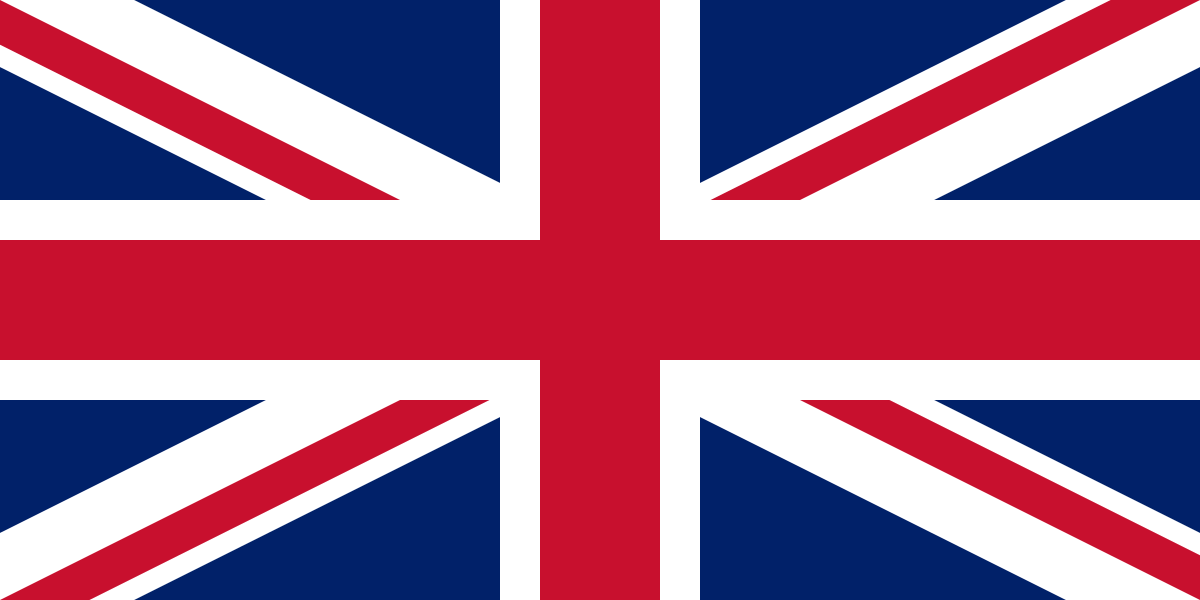

In [43]:
from urllib.request import urlopen
params = dict(
    format="json",
    action="query",
    titles="File:" + re.sub(" ", "%20", makedict(info)["国旗画像"]),
    prop="imageinfo",
    iiprop="url"
)
url = "http://en.wikipedia.org/w/api.php?" + "&".join("{}={}".format(k,v) for k,v in params.items())
req = urlopen(url)
data = json.loads(req.read().decode('utf-8'))

# BFS
from collections import deque
def findurl(data):
    q = deque()
    q.append(data)
    while not len(q) == 0:
        i = q.popleft()
        if "url" in i.keys():
            return i["url"]
        for ch in i.values():
            if type(ch) == dict:
                q.append(ch)
            elif type(ch) == list:
                for gdch in ch:
                    if type(gdch) == dict:
                        q.append(gdch)
print(answer:=findurl(data))

from IPython.display import SVG
SVG(answer)



# 第4章: 形態素解析

夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [44]:
!wget -nc https://nlp100.github.io/data/neko.txt
!mecab -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd -o neko.txt.mecab neko.txt 
!head neko.txt.mecab

File ‘neko.txt’ already there; not retrieving.

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩は猫である	名詞,固有名詞,一般,*,*,*,吾輩は猫である,ワガハイハネコデアル,ワガハイワネコデアル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS


## 30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [45]:
neko = []
with open("neko.txt.mecab") as f:
    sentence = []
    while line := f.readline():
        d = line.split("\t")
        if len(d) < 2:
            if "EOS" in line:
                neko.append(sentence)
                sentence = []
            continue
        d1 = d[1].split(",")
        sentence.append(dict(
            surface=d[0], base=d1[6], pos=d1[0], pos1=d1[1]
        ))

In [46]:
neko[2:6]

[[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': '吾輩は猫である', 'base': '吾輩は猫である', 'pos': '名詞', 'pos1': '固有名詞'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'},
  {'surface': '', 'base': '*\n', 'pos': '記号', 'pos1': '一般'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'},
  {'surface': '', 'base': '*\n', 'pos': '記号', 'pos1': '一般'}],
 [{'surface': '', 'base': '*\n', 'pos': '記号', 'pos1': '一般'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'},
  {'surface': '生れ', 'base': '生れる', 'pos': '動詞', 'pos1': '自立'},
  {'surface': 'た', 'base': 'た', 'pos': '助動

## 31. 動詞

動詞の表層形をすべて抽出せよ．

## 32. 動詞の原形

動詞の原型をすべて抽出せよ．

In [47]:
surfaces = []
bases = []

for sen in neko: 
    for word in sen:
        if word["pos"] == "動詞":
            surfaces.append(word["surface"])
            bases.append(word["base"])

for i in range(10):
    print(surfaces[i], bases[i])

生れ 生れる
つか つく
泣い 泣く
し する
いる いる
始め 始める
見 見る
聞く 聞く
捕え 捕える
煮 煮る


## 33. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [48]:
connected = []
for sen in neko: 
    for i, word in enumerate(sen):
        if word["pos"] == "名詞" and i < len(sen)-2 and \
                sen[i+1]["surface"] == "の" and \
                sen[i+1]["pos"] == "助詞" and \
                sen[i+2]["pos"] == "名詞":
            connected.append(sen[i]["surface"] + sen[i+1]["surface"] + sen[i+2]["surface"])
connected[:10]  

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親']

## 34. 名詞の連接

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [49]:
connect = []
for sen in neko: 
    for i, word in enumerate(sen):
        if word["pos"] == "名詞" and (j := i) < len(sen)-1:
            while j < len(sen) and sen[j]["pos"] == "名詞":
                j += 1
            if j-i > 1:
                connect.append("".join(list(map(lambda x: x["surface"], sen[i:j]))))
print(connect[:10])

['した所', '人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', '邸内', '書生以外', '四五遍']


## 35. 単語の出現頻度

文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

## 36. 頻度上位10語

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．


[('の', 9100), ('て', 6677), ('は', 6384), ('に', 6146), ('を', 6068), ('だ', 5830), ('と', 5474), ('が', 5258), ('た', 4194), ('する', 3543)]


<BarContainer object of 10 artists>

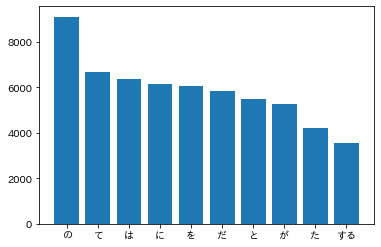

In [50]:
from collections import defaultdict
word_count = defaultdict(int)
for sen in neko: 
    for word in sen:
        if word["pos"] != "記号":
            word_count[word["base"]] += 1
word_sorted = sorted(word_count.items(), key=lambda x:-x[1])
print(topwords := word_sorted[:10])

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'IPAexGothic'
%matplotlib inline

topT = [list(map(lambda x:x[0], topwords)), list(map(lambda x:x[1], topwords))]
plt.bar(*topT, align="center")

## 37. 「猫」と共起頻度の高い上位10語

「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

[('の', 0.782608695652174), ('は', 0.7342995169082126), ('だ', 0.6280193236714976), ('を', 0.5942028985507246), ('て', 0.5748792270531401), ('に', 0.5700483091787439), ('と', 0.5652173913043478), ('が', 0.5410628019323671), ('する', 0.47342995169082125), ('ある', 0.4492753623188406)]


<BarContainer object of 10 artists>

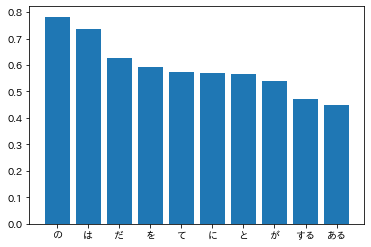

In [51]:
cat_colocate = defaultdict(int)
cat_count = 0
for sen in neko: 
    if "猫" in tuple(map(lambda x: x["base"], sen)):
        cat_count += 1
        appeared = set()
        for word in sen:
            if word["pos"] != "記号" and word["base"] not in appeared:
                appeared.add(word["base"])
        for word_base in appeared:
            cat_colocate[word_base] += 1
cat_sorted = sorted(cat_colocate.items(), key=lambda x:-x[1])
cat_sorted = list(map(lambda x: (x[0], x[1]/cat_count), cat_sorted))
print(top_cat := cat_sorted[1:11])  # 1 番目は "猫" = 1.0

topcatT = [list(map(lambda x:x[0], top_cat)), list(map(lambda x:x[1], top_cat))]
plt.bar(*topcatT, align="center")

## 38. ヒストグラム

単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

In [52]:
histdata = sorted(list(word_count.values()),reverse=True)
sns.distplot(histdata, kde=False, rug=False)

NameError: name 'sns' is not defined

In [53]:
sns.distplot(histdata[100:], bins=100, kde=False, rug=False)


NameError: name 'sns' is not defined

## 39. Zipfの法則

単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

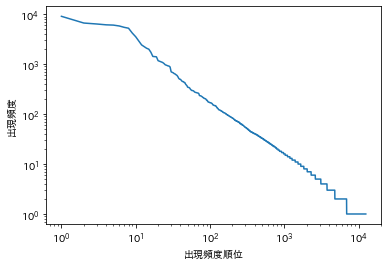

In [54]:
x = [i+1 for i in range(len(histdata))]
plt.plot(x, histdata)
ax = plt.gca()
ax.set_xscale("log")
plt.xlabel('出現頻度順位')
ax.set_yscale("log")
plt.ylabel('出現頻度')

plt.show()